In [1]:
import numpy as np
import json

In [2]:
from influence_info.influencers.experiments.pairwise_applicator import *

In [6]:
vals = get_all_values("outputs/MNIST/test/image_classifier/", ["influence_function_softmax/*", "representer_points_with_sec"])

['outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:False', 'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True', 'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:False,norm_grad:False', 'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:False,norm_grad:True', 'outputs/MNIST/test/image_classifier/representer_points_with_sec']


In [7]:
vals[0][2].shape

(500, 5000, 10)

In [10]:
abs(-1)

1

In [11]:
from scipy.stats import spearmanr
func = lambda x, y : abs(spearmanr(x.flatten(), y.flatten()).correlation)
applicator = mean_pairwise_applicator(func)
triplets = pairwise_experiment(vals, applicator)

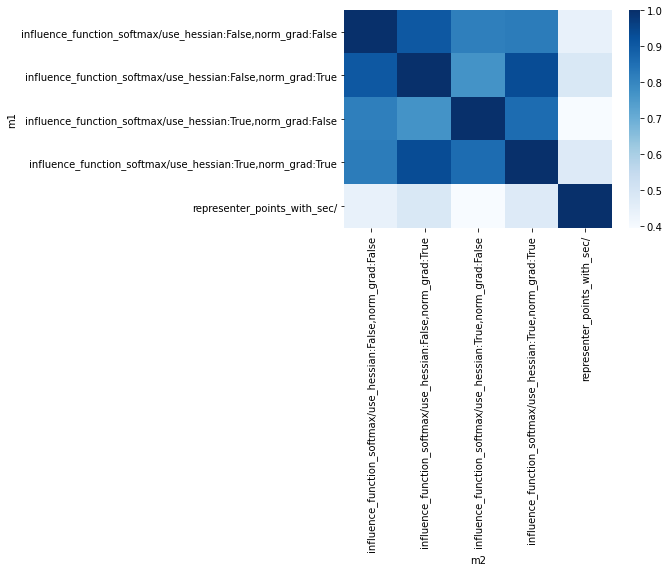

In [12]:
plot_pairwise_matrix(triplets)

In [ ]:
vals[0][:2]

In [ ]:
influence_values = np.load('outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/influence_values.npy')
influence_values_rep = np.load('outputs/MNIST/test/image_classifier/representer_points_with_sec/influence_values.npy')
training_idx, validation_idx = [json.load(open(f'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/{x}_idx.json')) for x in ['training', 'validation']]

In [ ]:
pred = [json.loads(line) for line in open("outputs/MNIST/test/image_classifier/predictions.dev.jsonl")]

In [ ]:
devclasses = [p['gold_labels'] for p in pred]
influence_values_rep = np.concatenate([influence_values_rep[i, :, p][None, :] for i, p in enumerate(devclasses)], axis=0)

In [ ]:
from scipy.stats import spearmanr
corr = [spearmanr(x, y).correlation for x, y in zip(influence_values, influence_values_rep)]

import matplotlib.pyplot as plt 
plt.hist(corr)

In [ ]:
influence_values.min()

In [ ]:
plt.scatter(influence_values[200], influence_values_rep[200])

In [ ]:
from influence_info.dataset_readers.image_reader import ImageReader
reader = ImageReader(as_is=True)
training_data = {i: (image, label) for (i, image, label) in list(reader._read('train'))}
validation_data = {i: (image, label) for (i, image, label) in list(reader._read('dev'))}

In [ ]:
import random
import matplotlib.pyplot as plt

for i in range(5) :
    i = random.randint(0, 450)
    v = validation_data[i]
    plt.imshow(v[0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :]
    top = np.argsort(vals)[-5:]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("==="*10)

In [ ]:
influence_values.shape